In [1]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
from kernels import *
import pdb
import gpytorch
from itertools import product
import random
import sys

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def find_all_real_roots(expr, max_iterations=10000):
    degr = expr.degree(var('x'))
    zeros = []
    iteration = 0
    for root in expr.roots():
        for i in range(root[1]):
            zeros.append(root[0])
    if not len(zeros) == degr:
        while not len(zeros) == degr or iteration >= max_iterations:
            iteration += 1
            max_search = randrange(sys.maxsize)
            min_search = min_search - int(sys.maxsize*0.1)
            try:
                root = find_root(expr, min_search, max_search)
                zeros.append(root)
            except:
                continue
    return zeros

In [3]:
# TODO Nochmal durchlaufen lassen
def get_prepared_SNF(input_matrix, left_var=var('dx1'), right_var=var('dx2')):
    d, u, v = input_matrix.smith_form()
    (r, c) = np.shape(d)
    if r > c:
        assert "More rows than columns in diagonal matrix D"
    if not d == u*input_matrix*v:
        assert "The calculation of the Smith form failed or is not possible"
    V_left_transpose = matrix([[e.substitute(left_var) for e in row] for row in v.transpose()])
    V_right = matrix([[e.substitute(right_var) for e in row] for row in v])
    row = [None] * c
    pre_diff_kernel_matrix = []
    for i in range(c):
        temp = copy(row)
        if i < r and d[i][i] == 0 or i >= r:
            temp[i] = Diff_SE_kernel(var=0, length=0)
        #elif i < r and not type(d[i][i]) in [sage.rings.integer.Integer, sage.rings.real_mpfr.RealLiteral]:
        #    find_all_real_roots(d[i][i])
        pre_diff_kernel_matrix.append(temp)
    return pre_diff_kernel_matrix, V_left_transpose, V_right

In [4]:

R.<x> = QQ[]
m = x^2*matrix(R, 2,3,[1, 0, 1, 1, 0, 0]) +x* matrix(R, 2,3,[-1, -1, -2, -2, 1, 1]) + matrix(R, 2,3,[0, 1, 1, 0, 0, -1])


dx1 = var('dx1')
dx2 = var('dx2')
#L = [[2, 1, 0], [3/2, -1/2*dx1 + 2, -1], [-dx1 - 1, dx1^2 - 3*dx1, 2*dx1]]
#R = [[2, 3/2, -dx2 - 1], [1, -1/2*dx2 + 2, dx2^2 - 3*dx2], [0, -1, 2*dx2]]
#L = matrix(L)
#R = matrix(R)

T, L, R = get_prepared_SNF(m, dx1, dx2)
print(m)

print(T)
print(L)
print(R)
print("---")
d, u, v = m.smith_form()
d[1][1].roots()

[      x^2 - x        -x + 1 x^2 - 2*x + 1]
[    x^2 - 2*x             x         x - 1]
[[None, None, None], [None, None, None], [None, None, Diff_SE_kernel()]]
[            2             1             0]
[          3/2  -1/2*dx1 + 2            -1]
[     -dx1 - 1 dx1^2 - 3*dx1         2*dx1]
[            2           3/2      -dx2 - 1]
[            1  -1/2*dx2 + 2 dx2^2 - 3*dx2]
[            0            -1         2*dx2]
---


[(1, 2)]

In [5]:
a = x^2 - 1
print(a.roots())
#find_root(a, -2, 10)


[(1, 1), (-1, 1)]


In [6]:
randrange(sys.maxsize)- int(sys.maxsize*0.1)

2837214305325298369

In [7]:
train_x = torch.linspace(float(0), float(3), int(75))
# The original sin/cos data
#one = torch.sin(train_x * (float(2) * math.pi)) + torch.randn(train_x.size()) * float(0.2)
#two = torch.cos(train_x * (float(2) * math.pi)) + torch.randn(train_x.size()) * float(0.2)

# Polynomials + diff(poly) data
#one = torch.pow(train_x, int(3)) + torch.randn(train_x.size()) * float(0.2)
#two = int(3)*torch.pow(train_x, int(2)) + torch.randn(train_x.size()) * float(0.2)

# Polynomials + diff(poly) data
#one = torch.pow(train_x, int(3)) + torch.randn(train_x.size()) * float(0.2)
#two = int(6)*train_x + torch.randn(train_x.size()) * float(0.2)

# Polynomials + diff(poly) data
#one = torch.pow(train_x, int(5)) + torch.randn(train_x.size()) * float(0.2)
#two = int(60)*torch.pow(train_x, int(2)) + torch.randn(train_x.size()) * float(0.2)

# Polynomials + diff(poly) data
#one = torch.exp(train_x) + torch.randn(train_x.size()) * float(0.2)
#two = torch.exp(train_x) + torch.randn(train_x.size()) * float(0.2)
#three = torch.exp(train_x) + torch.randn(train_x.size()) * float(0.2)


noise = float(0)
# ODE_GP_Example.mw
one = torch.div(torch.cos(train_x) - torch.sin(train_x), int(2)) - torch.div(torch.exp(train_x), int(10)) + torch.randn(train_x.size()) * float(noise)
two = torch.cos(train_x) + torch.randn(train_x.size()) * float(noise)
three = torch.div(- torch.cos(train_x) - torch.sin(train_x), int(2)) - torch.div(torch.exp(train_x), int(10)) + torch.randn(train_x.size()) * float(noise)



train_y = torch.stack([one, two, three], int(-1))


In [8]:
print(train_x)
print(train_y)
print(np.shape(train_y))

# = torch.Tensor([[float(-0.3), float(0.99)],[float(-0.07), float(1.01)]])

tensor([0.0000, 0.0405, 0.0811, 0.1216, 0.1622, 0.2027, 0.2432, 0.2838, 0.3243,
        0.3649, 0.4054, 0.4459, 0.4865, 0.5270, 0.5676, 0.6081, 0.6486, 0.6892,
        0.7297, 0.7703, 0.8108, 0.8514, 0.8919, 0.9324, 0.9730, 1.0135, 1.0541,
        1.0946, 1.1351, 1.1757, 1.2162, 1.2568, 1.2973, 1.3378, 1.3784, 1.4189,
        1.4595, 1.5000, 1.5405, 1.5811, 1.6216, 1.6622, 1.7027, 1.7432, 1.7838,
        1.8243, 1.8649, 1.9054, 1.9459, 1.9865, 2.0270, 2.0676, 2.1081, 2.1486,
        2.1892, 2.2297, 2.2703, 2.3108, 2.3514, 2.3919, 2.4324, 2.4730, 2.5135,
        2.5541, 2.5946, 2.6351, 2.6757, 2.7162, 2.7568, 2.7973, 2.8378, 2.8784,
        2.9189, 2.9595, 3.0000])
tensor([[ 0.4000,  1.0000, -0.6000],
        [ 0.3752,  0.9992, -0.6240],
        [ 0.3494,  0.9967, -0.6473],
        [ 0.3227,  0.9926, -0.6699],
        [ 0.2951,  0.9869, -0.6918],
        [ 0.2666,  0.9795, -0.7129],
        [ 0.2373,  0.9706, -0.7332],
        [ 0.2072,  0.9600, -0.7528],
        [ 0.1763,  0.9479, -0.7

In [9]:

len(train_y.shape)

2

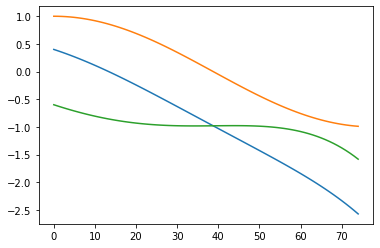

In [10]:
plt.plot(train_y)

$$
\begin{align}
L =& 
\left[
\begin{matrix}
1 & dx_1 \\
0 & 1
\end{matrix}
\right]\\
R =& 
\left[
\begin{matrix}
1 & 0\\
dx_2 & 1
\end{matrix}
\right]\\
\hat{k} =& 
\left[
\begin{matrix}
SE_1 & 0\\
0 & SE_2
\end{matrix}
\right]\\
k =& L*\hat{k}*R\\
=& \left[
\begin{matrix}
dx_1 dx_2 SE_2 + SE_1 & dx_1 SE_2\\
dx_2 SE_2 & SE_2
\end{matrix}
\right]
\end{align}
$$

In [11]:
dx1, dx2, k1, k2, f, g = var('dx1, dx2, k1, k2, f, g')
K = matrix(2,2, (k1, 0, 0, 0))
L = matrix(2, 2, (1, 0, dx1^2, 1))
R = matrix(2, 2, (1, dx2^2, 0, 1))
L*K*R
# used to see how the data should be created if I 
# decide to create it exactly as I create the kernel
#K = matrix(2,1, (f, g))
#L*L*K

[            k1       dx2^2*k1]
[      dx1^2*k1 dx1^2*dx2^2*k1]

In [12]:
dx1, a, b = var('dx1, a, b')
p = dx1*a + dx1*b + dx1^2
p.operands()
[('+' in str(op) or '^' in str(op)) for op in p.operands()]
#[not(not op in [sage.rings.integer.Integer, sage.rings.real_mpfr.RealLiteral] and op.has(d_var)) and ('+' in str(op) or '^' in str(op)) for op in p.operands()]

[False, False, True]

In [13]:
d_var=(dx1)
if type(p) in [sage.symbolic.expression.Expression] and any(not(not op in [sage.rings.integer.Integer, sage.rings.real_mpfr.RealLiteral] and op.has(d_var)) and ('+' in str(op) or '^' in str(op)) for op in p.operands()):
    print("Damn")

In [14]:
F.<a> = FunctionField(QQ)
F.<b> = FunctionField(F)
#a, b = var('a, b', domain='real')
x = var('x')
R.<x> = F[]
#R2.<a, b> = ZZ[]
m1 = matrix(R, 2, 3, [[a, b, x], [1, a+b, x]])
S, U, V = m1.smith_form()

print(U)
V

[                           1/a                              0]
[(-1/(a - 1))/(b + a^2/(a - 1))  (a/(a - 1))/(b + a^2/(a - 1))]


[                                 1                             -1/a*b ((-a/(a - 1))/(b + a^2/(a - 1)))*x]
[                                 0                                  1         ((-1)/(b + a^2/(a - 1)))*x]
[                                 0                                  0                                  1]

In [15]:
class MultitaskGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ZeroMean(), num_tasks=3
        )
        kernel = Diff_SE_kernel(var=0, length=0)
        kernel2 = Diff_SE_kernel(var=0, length=0)
        a, b, q, dx1, dx2, x = var('a, b, q, dx1, dx2, x')
        R.<x> = QQ[]
        #A = matrix(R, 2, 3, [x+a, -a, -1, -b, x+b, 0])
        A = matrix(R, 2, 3, [x, -x^2+x-1, x-2, 2-x, x^2-x-1, -x])
        
        
        #m = x^2*matrix(R, 2,3,[1, 0, 1, 1, 0, 0]) +x* matrix(R, 2,3,[-1, -1, -2, -2, 1, 1]) + matrix(R, 2,3,[0, 1, 1, 0, 0, -1])
        T, L, R = get_prepared_SNF(A, dx1, dx2)
        print(L)
        print("---")
        print(R)
        print("---")
        print(T)
        print("---")
#        L = matrix(2, 2, (1/2, 0, dx1^3, 1))
#        R = matrix(2, 2, (1, dx2^3, 0, 1))
        
        #L = matrix(3, 3, (0, 0, dx1+b, 0, 0, b, 0, 0, dx1*a + dx1*b + dx1^2))
        #R = matrix(3, 3, (dx2^2+dx2*b+dx2*a, b, dx2+b, 0, 0, 0, 0, 0, 0))
        p = DiffMatrixKernel(T)
        
        #p = DiffMatrixKernel([[None, None, None], [None, None, None], [None, None, kernel]])
        #p = DiffMatrixKernel([[kernel, None], [None, None]])
        self.covar_module = p.diff(left_matrix=L, right_matrix=R)
        
        #kernel0 = gpytorch.kernels.RBFKernel()
        #kernel1 = gpytorch.kernels.RBFKernel()
        #kernel2 = gpytorch.kernels.RBFKernel()
        #kernel0 = gpytorch.kernels.PeriodicKernel()
        #kernel1 = gpytorch.kernels.PeriodicKernel()
        #kernel0 = Diff_SE_kernel(var = 0, length=0)
        #kernel1 = Diff_SE_kernel(var = 0, length=0.01)
        #kernel2 = Diff_SE_kernel(var = 0, length=0.02)
        #self.covar_module = MatrixKernel([[kernel0, None], [None, kernel1]])

    def forward(self, x):
        #pdb.set_trace()
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        #print(f"{covar_x.detach().evaluate()}")
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x, validate_args=True)

likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=3)
#likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=2, has_global_noise=False, has_task_noise=False)
likelihood._set_task_noises(torch.Tensor([float(0.0001), float(0.0001), float(0.0001)]))
#likelihood._set_noise(torch.tensor(float(0.0001)))
model = MultitaskGPModel(train_x, train_y, likelihood)
print(model.covar_module)

[        1         0         0]
[     -1/4         0      -1/4]
[2*dx1 + 2         4 2*dx1 - 2]
---
[        1      -1/4 2*dx2 + 2]
[        0         0         4]
[        0      -1/4 2*dx2 - 2]
---
[[None, None, None], [None, None, None], [None, None, Diff_SE_kernel()]]
---
List of all kernels: [Diff_SE_kernel()]
[[diffed_SE_kernel(), diffed_SE_kernel(), diffed_SE_kernel()], [diffed_SE_kernel(), diffed_SE_kernel(), diffed_SE_kernel()], [diffed_SE_kernel(), diffed_SE_kernel(), diffed_SE_kernel()]]
[0,0]: Received derivation form: [[[tensor(0.), tensor(0.)], 0, 0]]
Resulting list (including parameters):
 > Summand 0, entry 0:
polynom coefficients:[tensor(0.), tensor(0.)]
derivation coefficient:1
l exponent:0
(x1-x2) exponent:0


[0,1]: Received derivation form: [[[tensor(0.), tensor(-0.2500)], 0, 0]]
Resulting list (including parameters):
 > Summand 0, entry 0:
polynom coefficients:[tensor(0.), tensor(-0.2500)]
derivation coefficient:1
l exponent:0
(x1-x2) exponent:0


[0,2]: Received 

In [16]:
# Set into eval mode
model.eval()
likelihood.eval()

# Initialize plots

number_of_samples = int(150)
# Make predictions
with torch.no_grad():#, gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(float(-4), float(7), number_of_samples)
    #pdb.set_trace()
    outputs = model(test_x)
    predictions = likelihood(outputs)
    
    mean = predictions.mean
    lower, upper = predictions.confidence_region()
#print(mean)
#print(lower)
#print(upper)
# This contains predictions for both tasks, flattened out
# The first half of the predictions is for the first task
# The second half is for the second task

#dims = int(2)
#indices = [list(range(i, len(train_y), dims)) for i in range(dims)]


Text(0.5, 1.0, 'Prior')

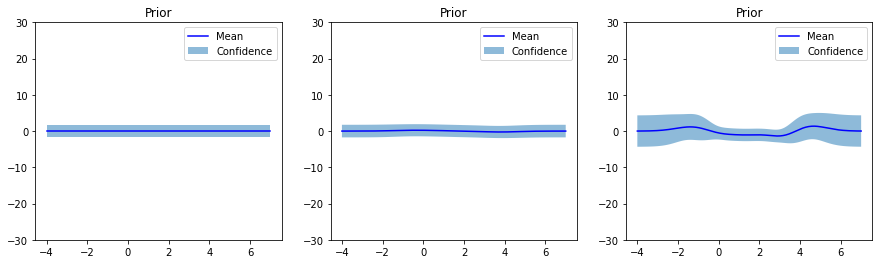

In [17]:
f, (y1_ax, y2_ax, y3_ax) = plt.subplots(int(1), int(3), figsize=(int(15), int(4)))

# Plot training data as black stars
#y1_ax.plot(train_x.detach().numpy(), train_y[:, 0].detach().numpy(), 'k*')
# Predictive mean as blue line
y1_ax.plot(test_x.numpy(), mean[:, 0].numpy(), 'b')
# Shade in confidence
y1_ax.fill_between(test_x.numpy(), lower[:, 0].numpy(), upper[:, 0].numpy(), alpha=0.5)
y1_ax.set_ylim([-30, 30])
y1_ax.legend(['Mean', 'Confidence'])
y1_ax.set_title('Prior')

# Plot training data as black stars
#y2_ax.plot(train_x.detach().numpy(), train_y[:, 1].detach().numpy(), 'k*')
# Predictive mean as blue line
y2_ax.plot(test_x.numpy(), mean[:, 1].numpy(), 'b')
# Shade in confidence
y2_ax.fill_between(test_x.numpy(), lower[:, 1].numpy(), upper[:, 1].numpy(), alpha=0.5)
y2_ax.set_ylim([-30, 30])
y2_ax.legend(['Mean', 'Confidence'])
y2_ax.set_title('Prior')

# Plot training data as black stars
#y2_ax.plot(train_x.detach().numpy(), train_y[:, 1].detach().numpy(), 'k*')
# Predictive mean as blue line
y3_ax.plot(test_x.numpy(), mean[:, 2].numpy(), 'b')
# Shade in confidence
y3_ax.fill_between(test_x.numpy(), lower[:, 2].numpy(), upper[:, 2].numpy(), alpha=0.5)
y3_ax.set_ylim([-30, 30])
y3_ax.legend(['Mean', 'Confidence'])
y3_ax.set_title('Prior')


In [18]:
for p in model.named_parameters():
    print(p)

('likelihood.raw_task_noises', Parameter containing:
tensor([-inf, -inf, -inf], requires_grad=True))
('likelihood.raw_noise', Parameter containing:
tensor([0.], requires_grad=True))
('covar_module.13091777024.var', Parameter containing:
tensor(0., requires_grad=True))
('covar_module.13091777024.length', Parameter containing:
tensor(0., requires_grad=True))


In [19]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = int(2) if smoke_test else int(75)


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=float(0.1))  # Includes GaussianLikelihood parameters


# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

param_dict = {p[0]:[] for p in model.named_parameters() if 'covar' in p[0]}
param_dict['loss'] = []
param_dict['noise'] = []
if len(likelihood.task_noises) > 1:
    param_dict['task_noises'] = [[] for i in range(len(likelihood.task_noises))]
for p in model.named_parameters():
    if 'covar' in p[0]:
        param_dict[f"{p[0]}_grad"] = []

for i in range(training_iter):

    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    param_dict['loss'].append(loss.item())
    #pdb.set_trace()
    loss.backward()
    for parameter in model.named_parameters():
        if 'covar' in parameter[0]:
            param_dict[parameter[0]].append(parameter[1].item())
            #param_dict[f"{parameter[0]}_grad"].append(parameter[1].grad.item())
    param_dict['noise'].append(likelihood.noise.item())
    for l in range(len(likelihood.task_noises)):
        param_dict['task_noises'][l].append(likelihood.task_noises[l].item())
    #print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f  variance: %.3f noise: %.3f' % (
    #    i + 1, training_iter, loss.item(),
    #    model.covar_module.length.item(),
    #    model.covar_module.var.item(),
    #    model.likelihood.noise.item()
    #))
    optimizer.step()

KeyboardInterrupt: 

In [ ]:
def coeffs(given_n):
    # See http://oeis.org/A096713
    real_n = int(given_n/2)
    m, k = var('m, k')
    # even
    # T(2*m, k) = (-1)^(m+k)*(2*m)!*2^(k-m)/((m-k)!*(2*k)!), k = 0..m.
    if given_n % 2 == 0:
        # This notation is only valid in iPython
        #T(m,k) = factorial(2*m)*2^(k-m)/(factorial(m-k)*factorial(2*k))
        # As an actual Python file I need to use:
        T = lambda m, k : (-1)**(m+k)*factorial(2*m)*2**(k-m)/(factorial(m-k)*factorial(2*k))
    # odd
    # T(2*m+1, k) = (-1)^(m+k)*(2*m+1)!*2^(k-m)/((m-k)!*(2*k+1)!), k = 0..m. (End)
    else:
        # See above
        #T(m,k) = factorial(2*m+1)*2^(k-m)/(factorial(m-k)*factorial(2*k+1))
        T = lambda m, k: (-1)**(m+k)*factorial(2*m+1)*2**(k-m)/(factorial(m-k)*factorial(2*k+1))
    return [int(T(real_n, k)) for k in range(real_n+1)]


In [ ]:
for i in range(10):
    print(coeffs(i))

In [ ]:
likelihood
#torch.autograd.functional.hessian(likelihood, train_x)

In [ ]:
for parameter in model.named_parameters():
    print(parameter)

In [ ]:
for param_key in param_dict:
    if param_key == 'task_noises':
        pass
    else:
        plt.plot(param_dict[param_key], label=param_key)
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)


In [ ]:
print(likelihood.noise)
print(likelihood.task_noises)

In [ ]:
A = matrix(QQ, 4, 4, (2,0,0.6065,0.6065,0,1,-0.6065,0.6065,0.6065,-0.6065,2,0,0.6065,0.6065,0,1))
L = A.cholesky()
L*L.transpose()

In [ ]:
for parameter in model.named_parameters():
    print(parameter)

In [ ]:
# Set into eval mode
model.eval()
likelihood.eval()

# Initialize plots

number_of_samples = int(150)
# Make predictions
with torch.no_grad():#, gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(float(-1), float(4), number_of_samples)
    #pdb.set_trace()
    outputs = model(test_x)
    predictions = likelihood(outputs)
    
    mean = predictions.mean
    lower, upper = predictions.confidence_region()
#print(mean)
#print(lower)
#print(upper)
# This contains predictions for both tasks, flattened out
# The first half of the predictions is for the first task
# The second half is for the second task

#dims = int(2)
#indices = [list(range(i, len(train_y), dims)) for i in range(dims)]


In [ ]:
f, (y1_ax, y2_ax, y3_ax) = plt.subplots(int(1), int(3), figsize=(int(15), int(4)))

# Plot training data as black stars
y1_ax.plot(train_x.detach().numpy(), train_y[:, 0].detach().numpy(), 'k*')
# Predictive mean as blue line
y1_ax.plot(test_x.numpy(), mean[:, 0].numpy(), 'b')
# Shade in confidence
y1_ax.fill_between(test_x.numpy(), lower[:, 0].numpy(), upper[:, 0].numpy(), alpha=0.5)
y1_ax.set_ylim([-30, 30])
y1_ax.legend(['Observed Data', 'Mean', 'Confidence'])
y1_ax.set_title('Observed Values (Likelihood)')

# Plot training data as black stars
y2_ax.plot(train_x.detach().numpy(), train_y[:, 1].detach().numpy(), 'k*')
# Predictive mean as blue line
y2_ax.plot(test_x.numpy(), mean[:, 1].numpy(), 'b')
# Shade in confidence
y2_ax.fill_between(test_x.numpy(), lower[:, 1].numpy(), upper[:, 1].numpy(), alpha=0.5)
y2_ax.set_ylim([-30, 30])
y2_ax.legend(['Observed Data', 'Mean', 'Confidence'])
y2_ax.set_title('Observed Values (Likelihood)')

# Plot training data as black stars
y3_ax.plot(train_x.detach().numpy(), train_y[:, 2].detach().numpy(), 'k*')
# Predictive mean as blue line
y3_ax.plot(test_x.numpy(), mean[:, 2].numpy(), 'b')
# Shade in confidence
y3_ax.fill_between(test_x.numpy(), lower[:, 2].numpy(), upper[:, 2].numpy(), alpha=0.5)
y3_ax.set_ylim([-30, 30])
y3_ax.legend(['Mean', 'Confidence'])
y3_ax.set_title('Prior')



In [ ]:
a = matrix(1, 2, (1, 2))
b = matrix(2, 2, (1, 2, 3, 4))
a*b

# Test Diffable SE Kernel

In [ ]:
X = torch.tensor([int(1), int(2), int(3)])
X

In [ ]:
X = torch.linspace(float(0), float(1), int(2))

In [ ]:
x1, x2, l, sigma = var('x1, x2, l, sigma')
lengthscale = 1
variance = 1
SE(x1, x2, l, sigma) = sigma^2*exp(-(x1-x2)^2/(2*l^2))
cov_matr = [[None for i in range(len(X))] for j in range(len(X))]
for i, (v1, v2) in enumerate(product(X, X)):
    cov_matr[int(i/len(X))][int(i%len(X))] = float(SE.diff(x2).diff(x2)(int(v1), int(v2), lengthscale, variance))
cov_matr

In [ ]:
SE(x1, x2, l, sigma) = sigma^2*exp(-(x1-x2)^2/(2*l^2))
#print(SE)
#print(SE.diff(x1).diff(x2))
print(SE.diff(x2).diff(x2))
#print(SE.diff(x1).diff(x2).diff(x1).diff(x2).diff(x1))
#print(SE.diff(x1).diff(x2).diff(x1).diff(x2))
#float(SE.diff(x2).diff(x1)(float(1.), float(1.), 1, 1))

In [ ]:
a = Diff_SE_kernel(var=int(variance), length=int(lengthscale))
q, dx1, dx2 = var('q, dx1, dx2')
left_poly = dx2
right_poly = dx1^3 
diffed_kernel = a.diff(left_poly=left_poly, right_poly=right_poly, left_d_var=var('dx2'), right_d_var=var('dx1'))
left_poly = dx2
right_poly = 1
diffed_kernel2 = a.diff(left_poly=left_poly, right_poly=right_poly, left_d_var=var('dx2'), right_d_var=var('dx1'))
diffed_kernel(X).evaluate() + diffed_kernel2(X).evaluate()

In [ ]:
def calc_cell_diff(L, M, R, context=None):
    len_M = np.shape(M)[0]
    temp = None
    # https://stackoverflow.com/questions/6473679/transpose-list-
    # of-lists
    M_transpose = list(
       map(list, itertools.zip_longest(*M, fillvalue=None)))
    for r_elem, row_M in zip(R, M_transpose):
        for l_elem, m_elem in zip(L, row_M):
            if temp is None:
                #if M_transpose[int(j/len_M)][j % len_M] is not None:
                if m_elem is not None:
                    temp = l_elem * m_elem*r_elem
                    #temp = l_elem * M_transpose[int(j/len_M)][j % len_M]*r_elem
                else:
                    pass
            else:
                if m_elem is not None:
                #if M_transpose[int(j/len_M)][j % len_M] is not None:
                    temp += l_elem * m_elem*r_elem
                    #temp += l_elem * M_transpose[int(j/len_M)][j % len_M]*r_elem
                else:
                    pass
    return temp.simplify_full()


In [ ]:
dimension = 3
length = dimension*dimension +1
L_list = [var(f'l_{i}{j}') for i in range(1, dimension+1) for j in range(1, dimension+1)]
M_list = [var(f'm_{i}{j}') for i in range(1, dimension+1) for j in range(1, dimension+1)]
R_list = [var(f'r_{i}{j}') for i in range(1, dimension+1) for j in range(1, dimension+1)]
L = matrix(dimension, dimension, L_list)
M = matrix(dimension, dimension, M_list)
R = matrix(dimension, dimension, R_list)
print(L)
print(M)
print(R)
row = 0
col = 0
for row in range(dimension):
    for col in range(dimension):
        print((L*M*R)[row][col])
print("\n\n")
for i, (l, r) in enumerate(itertools.product(L.rows(), R.columns())):

    print(calc_cell_diff(l, M, r))
    print("\n")

In [ ]:
def calc_cell_diff_sage(L, M, R, context=None):
    temp = None
    # https://stackoverflow.com/questions/6473679/transpose-list-
    # of-lists
    M_transpose = list(
        map(list, itertools.zip_longest(*M, fillvalue=None)))
    # Every row in 'M' is combined with each elem of the row given in 'R'
    # Or: For each elemtn in row 'R' combine with 'row_M'
    for r_elem, row_M in zip(R, M_transpose):
        # Each element in L gets exactly one element in 'row_M' to multiply
        # Or: Combine each element in row_M with exactly one element in 'L'
        for l_elem, m_elem in zip(L, row_M):
            if temp is None:
                if m_elem is not None:
                    if not l_elem == 0 and not r_elem == 0:
                        temp = m_elem.diff(l_elem).diff(r_elem)
                    #elif l_elem == 0 and not r_elem == 0:
                    #    temp = m_elem.diff(r_elem)
                    #elif not l_elem == 0 and r_elem == 0:
                    #    temp = m_elem.diff(l_elem)
                else:
                    pass
            else:
                if m_elem is not None:
                    if not l_elem == 0 and not r_elem == 0:
                        temp += m_elem.diff(l_elem).diff(r_elem)
                    #elif l_elem == 0 and not r_elem == 0:
                    #    temp += m_elem.diff(r_elem)
                    #elif not l_elem == 0 and r_elem == 0:
                    #    temp += m_elem.diff(l_elem)
                    
                else:
                    pass
    return temp

def diff_sage(matrix, left_matrix=None, right_matrix=None):
    # iterate left matrix by rows and right matrix by columns and call the
    # respective diff command of the kernels with the row/cols as params
    kernel = MatrixKernel(None)
    output_matrix = [[0 for i in range(np.shape(matrix)[1])] for j in range(np.shape(matrix)[0])]
    for i, (l, r) in enumerate(itertools.product(left_matrix.rows(), right_matrix.columns())):
        res = calc_cell_diff_sage(l, matrix, r, context=kernel)
        output_matrix[int(i/np.shape(matrix)[0])][
                    int(i % np.shape(matrix)[0])]  = res
    kernel.set_matrix(output_matrix)
    return output_matrix


In [ ]:
import pprint
L = matrix(2, 2, (x1, x1, 0, x1))
R = matrix(2, 2, (x2, 0, x2, x2))
x1, x2, l, sigma, l2, sigma2 = var('x1, x2, l, sigma, l2, sigma2')
lengthscale = torch.nn.functional.softplus(torch.tensor(float(0.0)))
variance = 1
lengthscale2 = torch.nn.functional.softplus(torch.tensor(float(0.0)))
variance2 = 1
SEKernelMatrix = [[sigma^2*exp(-(x1-x2)^2/(2*l^2)), sigma2^2*exp(-(x1-x2)^2/(2*l2^2))], [sigma2^2*exp(-(x1-x2)^2/(2*l2^2)), sigma^2*exp(-(x1-x2)^2/(2*l^2))]]
#diffed_SE_sage_matrix_kernel = diff_sage(SEKernelMatrix, left_matrix=L, right_matrix=R)
#pprint.pprint(diffed_SE_sage_matrix_kernel)
cov_matr = [[None for i in range(len(X)*len(SEKernelMatrix))] for j in range(len(X)*len(SEKernelMatrix))]
for i, (v1, v2) in enumerate(product(X, X)):
    for row in range(len(SEKernelMatrix)):
        for col in range(len(SEKernelMatrix)):
            # Blockwise
            #cov_matr[int(i/len(X))+row*len(X)][int(i%len(X))+col*len(X)] = SEKernelMatrix[row][col].substitute(x1=int(v1), x2=int(v2), l=float(lengthscale), sigma=variance, l2=float(lengthscale2), sigma2=variance2)
            # Interleaved
            text=f"x-pos: {int(((i*len(SEKernelMatrix))+row)/(len(X)*len(SEKernelMatrix)))*2+row}" +\
            f" y-pos: {int((i*len(SEKernelMatrix))+col)%(len(X)*len(SEKernelMatrix))}" + \
            f" x1, x2: {v1}, {v2}\n" +\
            f"(x1-x2)^2: {(v1-v2)**2}"+\
            f" exp((x1-x2)^2): {np.exp((v1-v2)**2)}\n"+\
            f"val: {float(SEKernelMatrix[row][col].substitute(x1=float(v1), x2=float(v2), l=float(lengthscale), sigma=variance, l2=float(lengthscale2), sigma2=variance2))}"
            print(text)
            print("---")
            cov_matr[int(((i*len(SEKernelMatrix))+row)/(len(X)*len(SEKernelMatrix)))*2+row][int((i*len(SEKernelMatrix))+col)%(len(X)*len(SEKernelMatrix))] = float(SEKernelMatrix[row][col].substitute(x1=float(v1), x2=float(v2), l=float(lengthscale), sigma=variance, l2=float(lengthscale2), sigma2=variance2))
cov_matr


In [ ]:
print(X)
print(torch.Tensor(cov_matr).eig())

In [ ]:
exp(-(-2-0.66)^2/(2))

In [ ]:

kernel = Diff_SE_kernel()
kernel2 = Diff_SE_kernel()
q, dx1, dx2 = var('q, dx1, dx2')
L = matrix(2, 2, (dx1, dx1, 0, dx1))
R = matrix(2, 2, (dx2, 0, dx2, dx2))

p = DiffMatrixKernel([[kernel, None], [None, kernel2]])
covar_module = p.diff(left_matrix=L, right_matrix=R)

covar_x = covar_module(X)
covar_x.evaluate()

In [ ]:
matr = [[2, 0, -6*e^(-2), 1, e^(-1/2), -e^(-2)],
 [0, 2, 0, -e^(-1/2), 1, e^(-1/2)],
 [-6*e^(-2), 0, 2, -5*e^(-2), -e^(-1/2), 1],
 [1, e^(-1/2), -e^(-2), 1, 0, -3*e^(-2)],
 [-e^(-1/2), 1, e^(-1/2), 0, 1, 0],
 [-5*e^(-2), -e^(-1/2), 1, -3*e^(-2), 0, 1]]

matr = [[2, 0, -6*e^(-2), 1, 0, -3*e^(-2)],
 [0, 2, 0, 0, 1, 0],
 [-6*e^(-2), 0, 2, -3*e^(-2), 0, 1],
 [1, 0, -3*e^(-2), 1, 0, -3*e^(-2)],
 [0, 1, 0, 0, 1, 0],
 [-3*e^(-2), 0, 1, -3*e^(-2), 0, 1]]

matr = torch.Tensor(matr)
import pprint
pprint.pprint(matr)
print(matr[0::3, 0::3])
H_x = 3
torch.vstack([torch.hstack([matr[k::H_x, l::H_x] for l in range(H_x)]) for k in range(H_x)])

In [ ]:
class testobject():
    def __init__(self, val):
        self.val = val
    
    def setVal(self, val):
        self.val = val
        
    def printVal(self):
        return self.val
    
    def __call__(self):
        return self.val

In [ ]:
t1 = testobject(42)
t2 = testobject(21)
t3 = testobject(17)
l = [[t1, t2], [t2, t3]]
print(l)
t2.setVal(170)
print(l[0][1].printVal())
print(l[1][0].printVal())

In [ ]:
q, dx1, dx2 = var('q, dx1, dx2')
left_poly = dx1
right_poly = dx2
L = matrix(2, 2, (dx1, 0, 0, dx1))
R = matrix(2, 2, (dx2, 0, 0, dx2))

In [ ]:
p.diff(left_matrix=L, right_matrix=R).forward(X, X)

In [ ]:
w, q, dx1, dx2 = var('w, q, dx1, dx2')
a = dx1^2
#a.degree(dx1)
a.operands()

In [ ]:
prod([1,2,3])

In [ ]:
a = torch.Tensor([[int(1), int(2), int(3)], [int(4), int(5), int(6)], [int(7), int(8), int(9)]])
for i, row in enumerate(a):
    for j, elem in enumerate(row[i:]):
        print(f"row: {i}, col: {i+j}")
        print(elem)

In [ ]:
a, b, c, d = var('a, b, c, d')
A = matrix(2,2, (a, b, c, d))
B = matrix(2, 2, (dx1, dx1, 0, dx1))
C = matrix(2, 2, (dx2, 0, dx2, dx2))
print(A)
print(B)
B*A

In [31]:
def big_func(a, b, c):
    print(a)
    print(b)
    return c*4
a = lambda x: big_func(1, 2, x)

a(42)

1
2


168